# Projekt 4: Hidden Markov Modelle

## Name: Dang Quynh Tram Nguyen

### Matrikelnummer: 5311561

**Aufgabe 1: Implementation der Viterbi-Algorithmus**

- Die Übergangswahrscheinlichkeiten (a) von Zustände und die Emissionswahrscheinlichkeiten (e) sind unten der Liste gespeichert.
- Die Liste der Übergangswahrscheinlichkeiten von Zustände enthält auch den Startzustand. Mit m Zustände und einem Startzustand gibt es insgesamt m<sup>2</sup> + m Übergänge, weil jeder Zustand alle Übergänge zu anderen Zuständen und demselben hat, außer des Startzustand, der nur die Übergänge zu anderen Zustände hat. 
- a[0...m][0...m] (m Zustände und ein Startzustand)
- e[1...m][1...x] (x Modelle)

Methode Viterbi beschreibt Viterbi Algorithmus. Sie ergibt den wahrscheinlichsten Zustandspfad der vorgegebenen Sequenz

In [1]:
import math
def Viterbi(sequenz, a, e,zustand_symbol,zustand_name):
    #e = Liste der Emissionswahrscheinlichkeiten
    #a = Liste der Übergangswahrscheinlichkeiten
    #zustand_symbol = Liste der Symbols der Zustände
    #zustand_name = Liste der Namen der Zustände. Die Indexes entsprechen diejenigen in zustand_symbol
    
    m = len(a) #Anzahl der Zustände (auch Startzustand)
    sequenz = "s"+sequenz #"s" ist Startzustand gemeint, alle andere Buchstaben sind in uppercase
    n = len(sequenz) #Länge der Sequenz
    
    matrix = [[0 for i in range(n)] for j in range(m)] #Matrix
    
    matrix[0][0] = 1 #Wahrsch. für Startzustand ist log(1) = 0
    for i in range(1,m):
        matrix[i][0] = 0 #keine anderer Zustand ist Startzustand
    for symbol in range(1,n):
        for zustand in range(1,m):
            if(zustand_symbol[zustand-1] != sequenz[symbol]): #wenn Zustand dem Symbol nicht passt
                matrix[zustand][symbol] = 0
            elif symbol == 1:
                matrix[zustand][symbol] = a[0][zustand] * max(e[zustand-1])
                #a[zustand-1] -> zustand-1 = Startzustand
                #e[zustand-1] -> zustand-1 = Index des entsprechenden Zustands in Emissionswahr.-Liste, weil diese Liste keine Startzustand enthält
            else:
                max_wahr = 0
                for vorzustand in range(1,m):
                    if matrix[vorzustand][symbol-1] == 0: continue
                    else:
                        wahr = a[vorzustand][zustand] * matrix[vorzustand][symbol-1]
                        max_wahr = max(wahr,max_wahr)
                matrix[zustand][symbol] = max_wahr * max(e[zustand-1])
            #e[zustand] ist eine Liste, die die Emissionswahrscheinlichkeit der Zustand mit viel 0 enthält. Deswegen entspricht das Maximum die Emisssionswahrscheinlichkeit.

    traceback = [0 for i in range(n)] #Liste der Indexes der beste Zustände jedes Symbols
    for i in range(1,n):
        traceback[i] = zustand_name[find_max(m,i,matrix)-1]
    traceback.remove(0)
    #Check
    print("Matrix")
    for i in matrix:
        if(matrix.index(i)==0): print("s",i)
        else: print(zustand_name[matrix.index(i)-1],i)
   
    return traceback

In [2]:
import math
def Viterbi_log(sequenz, a, e,zustand_symbol,zustand_name):
    #e = Liste der Emissionswahrscheinlichkeiten
    #a = Liste der Übergangswahrscheinlichkeiten
    #zustand_symbol = Liste der Symbols der Zustände
    #zustand_name = Liste der Namen der Zustände. Die Indexes entsprechen diejenigen in zustand_symbol
    
    m = len(a) #Anzahl der Zustände (auch Startzustand)
    sequenz = "s"+sequenz #"s" ist Startzustand gemeint, alle andere Buchstaben sind in uppercase
    n = len(sequenz) #Länge der Sequenz
    
    matrix = [[-math.inf for i in range(n)] for j in range(m)] #Matrix
    
    matrix[0][0] = 0 #Wahrsch. für Startzustand ist log(1) = 0
    for i in range(1,m):
        matrix[i][0] = -math.inf #keine anderer Zustand ist Startzustand
    for symbol in range(1,n):
        for zustand in range(1,m):
            if(zustand_symbol[zustand-1] != sequenz[symbol]): #wenn Zustand dem Symbol nicht passt
                matrix[zustand][symbol] = -math.inf
            elif symbol == 1:
                matrix[zustand][symbol] = math.log10(a[0][zustand] * max(e[zustand-1])) 
                #a[zustand-1] -> zustand-1 = Startzustand
                #e[zustand-1] -> zustand-1 = Index des entsprechenden Zustands in Emissionswahr.-Liste, weil diese Liste keine Startzustand enthält
            else:
                max_wahr = -math.inf
                for vorzustand in range(1,m):
                    if matrix[vorzustand][symbol-1] == -math.inf: continue
                    else:
                        wahr = math.log10(a[vorzustand][zustand]) + matrix[vorzustand][symbol-1]
                        max_wahr = max(wahr,max_wahr)
                matrix[zustand][symbol] = max_wahr + math.log10(max(e[zustand-1]))
            #e[zustand] ist eine Liste, die die Emissionswahrscheinlichkeit der Zustand mit viel 0 enthält. Deswegen entspricht das Maximum die Emisssionswahrscheinlichkeit.

    traceback = [0 for i in range(n)] #Liste der Indexes der beste Zustände jedes Symbols
    for i in range(1,n):
        traceback[i] = zustand_name[find_max(m,i,matrix)-1]
    traceback.remove(0)
    #Check
    import pandas as pd
    if (n <= 11):
        print("Matrix")
        for i in matrix:
            if(matrix.index(i)==0): print("s",i)
            else: print(zustand_name[matrix.index(i)-1],i)
        print(pd.DataFrame(matrix))
    return traceback

Methode gibt den Index der maximalen Wahrscheinlichkeit an einem Symbol der Sequenz zurück

In [3]:
def find_max(zustand,symbol,matrix):
    #zustand = Anzahl der Zustände
    #symbol = Index der Symbol in der Sequenz
    # matrix vom Viterbi-Algorithmus
    
    m = 1
    for z in range(2,zustand):
        if (matrix[z][symbol]>matrix[m][symbol]): 
            m=z
    return m

**Aufgabe 2: Sequenzen generieren**

Listen der Namen der Zuständen (ihre Namen sowie die Symbols entsprechenden)
- Modell (+) beschreibt die Basen der CpG-Inseln
- Modell (-) beschreibt die Basen der sonstigen DNA

In [4]:
zustand_symbol = ["A","T","G","C","A","T","G","C"] #Buchstaben sollten ähnlich wie der Symbols
#4 ersten Buchstaben gehören zum Modell (-), 4 letzten zum Modell (+)
zustand_name = ["A-","T-","G-","C-","A+","T+","G+","C+"]
zustand_name

['A-', 'T-', 'G-', 'C-', 'A+', 'T+', 'G+', 'C+']

Liste der Übergangswahrscheinlichkeiten

In [5]:
a = [[0 for i in range(9)] for j in range(9)]
for i in range(1,9):
    a[0][i] = 0.5
    
#Modell (-) zu demselben und zu anderem
for i in range(1,5):
    for j in range(1,5):
        a[i][j] = 0.98 # (hier wird später geändert)
    for k in range(5,9):
        a[i][k] = 0.02 # (hier wird später geändert)

#Modell (+) zu demselben und zu anderem
for i in range(5,9):
    for j in range(5,9):
        a[i][j] = 0.9
    for k in range(1,5):
        a[i][k] = 0.1

a

[[0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0, 0.98, 0.98, 0.98, 0.98, 0.02, 0.02, 0.02, 0.02],
 [0, 0.98, 0.98, 0.98, 0.98, 0.02, 0.02, 0.02, 0.02],
 [0, 0.98, 0.98, 0.98, 0.98, 0.02, 0.02, 0.02, 0.02],
 [0, 0.98, 0.98, 0.98, 0.98, 0.02, 0.02, 0.02, 0.02],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9]]

Liste der Emissionswahrscheinlichkeiten

In [6]:
e = [[0 for i in range(2)] for j in range(8)]
#erste Spalte ist Modell(-), zweite ist Modell (+)
for i in range(0,4):
    e[i][0] = 0.25
for i in range(4,8):
    if i<=5: e[i][1] = 0.125
    else: e[i][1] = 0.375
e

[[0.25, 0],
 [0.25, 0],
 [0.25, 0],
 [0.25, 0],
 [0, 0.125],
 [0, 0.125],
 [0, 0.375],
 [0, 0.375]]

Methode erzeugt eine zufällige Symbolsequenz und ihren Pfad aus der vorgegeben Emissionswahrscheinlichkeiten in den Modelle sowie der Übergangswahrscheinlichkeiten zwischen den Zuständen

In [7]:
import random as rd
def erstellen(zustand_symbol,zustand_name,a,e,l):
    #l = Länge der erzeugten Sequenz
    
    sseq = "" #Symbolsequenz
    pfad = [] #Pfad / Zustandsequenz
    m = 0
    for i in range (l):
        r = rd.random() #Zufälliger Wert liegt zwischen 0 bis 1
        zustand = len(zustand_symbol) 
        
        if(i==0):
            if r <= 0.5: 
                zustand = modell_neg()
                m = -1
            else:
                zustand = modell_pos()
                m = 1
                
        elif m==-1: # Modell (-)
            if r<= 0.02: # (hier wird später geändert)
                zustand = modell_pos()
                m = 1
            else: zustand = modell_neg()
        elif m==1: # Modell (+)
            if r<= 0.1:
                zustand = modell_neg()
                m = -1
            else: zustand = modell_pos()
        
        assert zustand < len(zustand_symbol) and zustand >= 0, "Out of index of list zustand_symbol und zustand_name."
        sseq += zustand_symbol[zustand]
        pfad.append(zustand_name[zustand])   
            
    return [sseq, pfad]

Methoden geben den Index in der Liste zustand_symbol sowie zustand_name zurück

In [8]:
def modell_neg():
    r = rd.random()
    if r <= 0.25: return 0 # A-
    elif r>0.25 and r<=0.5: return 1 # T-
    elif r>0.5 and r<=0.75: return 2 # G-
    else: return 3 # C-

In [9]:
def modell_pos():
    r = rd.random()
    if r <= 0.125: return 4 # A+
    elif r>0.125 and r<=0.25: return 5 # T+
    elif r>0.25 and r<=0.625: return 6 # G+
    else: return 7 # C+

Ein Beispiel, die oben geschriebenen Methoden durchzuführen

In [10]:
neu = erstellen(zustand_symbol,zustand_name,a,e,7)
neu

['CCGCCTC', ['C+', 'C+', 'G+', 'C+', 'C+', 'T+', 'C+']]

In [11]:
viterbi_pfad = Viterbi(neu[0],a,e,zustand_symbol,zustand_name)
viterbi_pfad

Matrix
s [1, 0, 0, 0, 0, 0, 0, 0]
A- [0, 0, 0, 0, 0, 0, 0, 0]
T- [0, 0, 0, 0, 0, 0, 0.00011034189414062498, 0]
G- [0, 0, 0, 0.007503124999999999, 0, 0, 0, 0]
C- [0, 0.125, 0.030625, 0, 0.0018382656249999998, 0.00045037507812499994, 0, 2.703376406445312e-05]
A- [0, 0, 0, 0, 0, 0, 0, 0]
T+ [0, 0, 0, 0, 0, 0, 0.00027368368148803716, 0]
G+ [0, 0, 0, 0.021357421875000004, 0, 0, 0, 0]
C+ [0, 0.1875, 0.06328125000000001, 0, 0.007208129882812501, 0.002432743835449219, 0, 9.236824250221255e-05]


['C+', 'C+', 'G+', 'C+', 'C+', 'T+', 'C+']

In [12]:
viterbi_pfad2 = Viterbi_log(neu[0],a,e,zustand_symbol,zustand_name)
viterbi_pfad2

Matrix
s [0, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
A- [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
T- [-inf, -inf, -inf, -inf, -inf, -inf, -3.957259565169282, -inf]
G- [-inf, -inf, -inf, -2.1247578182628786, -inf, -inf, -inf, -inf]
C- [-inf, -0.9030899869919435, -1.5139239026274112, -inf, -2.7355917338983464, -3.3464256495338143, -inf, -4.56809348080475]
A- [-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf]
T+ [-inf, -inf, -inf, -inf, -inf, -inf, -3.5627510968207066, -inf]
G+ [-inf, -inf, -inf, -1.6704511736021748, -inf, -inf, -inf, -inf]
C+ [-inf, -0.7269987279362623, -1.1987249507692186, -inf, -2.142177396435131, -2.6139036192680876, -inf, -4.0344773196536625]
     0         1         2         3         4         5         6         7
0  0.0      -inf      -inf      -inf      -inf      -inf      -inf      -inf
1 -inf      -inf      -inf      -inf      -inf      -inf      -inf      -inf
2 -inf      -inf      -inf      -inf      -inf      -inf -3.957260      -inf
3 -inf      -in

['C+', 'C+', 'G+', 'C+', 'C+', 'T+', 'C+']

**Aufgabe 3: Viterbi-Algorithmus testen**

T = True, F = False

P = Positiv, N = Negativ

Modell\Ground truth|+|-
-:|-|-
+|TP|FP
-|FN|TN

Methode erzeugt ein Dictionary von TP, FP, FN und TN des vorhergesagten Modell (mithilfe der Viterbi-Algorithmus) im Vergleich zu des realen Pfad

In [13]:
def dictionary(modell,pfad):
    assert len(modell) == len(pfad), "die Längen zweier Sequenz sollten gleich sein."
    dic = {"TP":0, "FP":0, "TN":0, "FN":0}
    for zustand in range(len(modell)):
        assert modell[zustand][0] == pfad[zustand][0], "Methode Viterbi ist fehlerhaft."
        m = modell[zustand][1] #Modell des Zustandes des vorhergesagten Modells
        p = pfad[zustand][1] # Modell des Zustandes des realen Pfad
        assert m == "+" or m == "-", "Es passt keinem Modell"
        if m == "+":
            if p == "+": dic["TP"] +=1
            else: dic["FP"] +=1
        if m == "-":
            if p == "+": dic["FN"] +=1
            else: dic["TN"] +=1
    return dic

- Sensitivität beschreibt die Wahrscheinlichkeit, dass die positiven Zustände, die CpG-Inseln aufweisen, relativ zu deren tatsächlichen Anzahl in einer Sequenz vorhergesagt werden.

Sensitivität = $\frac{TP}{TP + FN}$

- Spezifität beschreibt die Wahrscheinlichkeit, dass die negativen Zustände, die sontige DNA aufweisen, relativ zu deren tatsächlichen Anzahl in einer Sequenz vorhergesagt werden.

Spezifität = $\frac{TN}{TN + FP}$

Testen 1000 Sequenzen mit Länge 1000 bp

In [14]:
count = 1000
sensitivitaet = []
spezifizitaet = []
while(count>0):
    
    seq = erstellen(zustand_symbol,zustand_name,a,e,1000)
    sseq = seq[0]
    #print("Sequenz",count,":",sseq)
    pfad = seq[1]
    #print("Pfad",pfad)
    
    modell = Viterbi_log(sseq,a,e,zustand_symbol,zustand_name)
    #print("Modell",modell)
    d = dictionary(modell,pfad)
    #print(d)
    if(d["TP"] == 0): sensi = 0
    else: sensi = d["TP"] / (d["TP"] + d["FN"])
    sensitivitaet.append(sensi)
    
    if(d["TN"] == 0): spezi = 0
    else: spezi = d["TN"] / (d["TN"] + d["FP"])
    spezifizitaet.append(spezi)
    count -= 1
print("sensi",sensitivitaet[1:20])
print("spezi",spezifizitaet[1:20])

sensi [0.13636363636363635, 0.10144927536231885, 0.03018867924528302, 0.12994350282485875, 0.0411522633744856, 0.12871287128712872, 0.12562814070351758, 0.0297029702970297, 0.30434782608695654, 0.03482587064676617, 0.046153846153846156, 0.11, 0.02531645569620253, 0.09392265193370165, 0.2681564245810056, 0.09223300970873786, 0.06787330316742081, 0, 0.027777777777777776]
spezi [1.0, 0.9810844892812106, 0.9945578231292517, 0.9793438639125152, 0.9947159841479525, 0.981203007518797, 0.9762796504369539, 0.993734335839599, 0.9546568627450981, 0.9962453066332916, 0.996551724137931, 0.9777777777777777, 0.9893111638954869, 0.9914529914529915, 0.9792935444579781, 0.9458438287153652, 0.9871630295250321, 0.9912758996728462, 0.985969387755102]


Boxplot

C:\Users\quynh\AppData\Local\Temp\ipykernel_12116\1705630701.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sensitivität','Spezifität'])


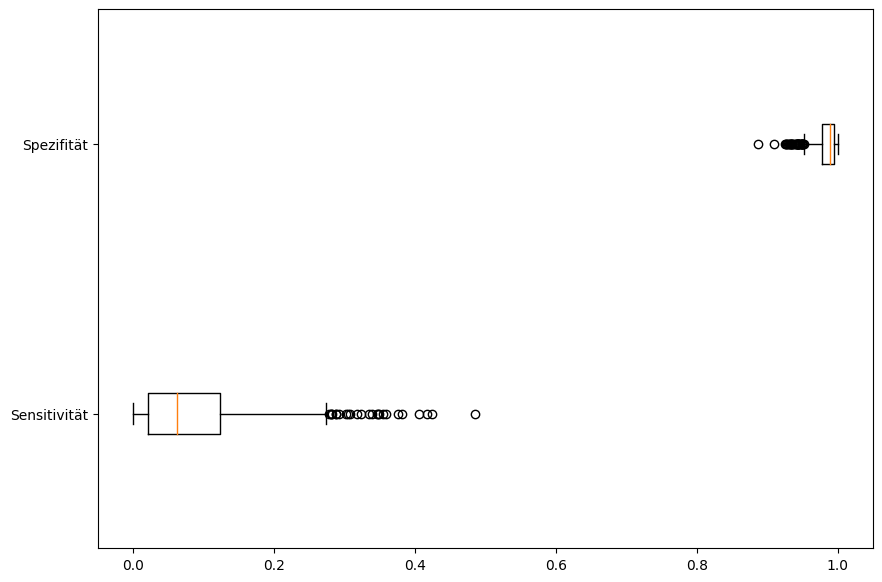

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_yticklabels(['Sensitivität','Spezifität'])
plt.boxplot([sensitivitaet,spezifizitaet],vert = 0)
plt.show()

In der Grafik kann man sehen, dass die Wahrscheinlichkeiten des positiven Modells (CpG-Inseln) sehr niedrig (Median < 0,1) sind, das Minimum 0 erreicht. Das heißt, dass das Modell der CpG-Inseln mit angegebenen Daten selten in den Zufallssequenzen auftrat sowie durch Viterbi-Algorithmus erkannt wird. Hingegen ist mehrere negativen Zustände von sonstiger DNA gefunden. Die höchsten Wahrscheinlichkeiten steigen mehrmals auf 1.0.

Die hohen Wahrscheinlichkeiten bei der Spezifität bedeutet, dass die Vorhersage das negative Modell der sonstigen DNA sehr gut erkennen kann. Im Gegensatz dazu ist das Ergebnis sehr schlecht bei den positiven Zuständen. Sie wird meistens als die negativen prognostiziert. Dies wirkt sich auf die Untersuchung der CpG-Inseln in der Sequenzen, da eine große Menge der CpG-Inseln absichtslos verpasst wird. 

Dieses Ergebnis folgt die niedrige Übergangswahrscheinlichkeit vom Modell (-) zum Modell (+) (0.02). Das heißt, wenn ein Symbol in der Sequenz einen negativen Zustand aufweist, wird das nächste Symbol meistens auch einen negativen vorhergesagt.

**Aufgabe 4: Modell anpassen** 

Um die Wahrscheinlichkeiten der Sensitivität zu erhöhen, sollte die obengenannte Übergangswahrscheinlichkeit erhöht werden. Je höher die Wahrscheinlichkeit vom negativen zum positiven Modell ist, desto höher ist die Sensitivität. 

Die Übergangswahrscheinlichkeit vom negativen zum positiven Modell wird beispielsweise auf 0.6 gesteigert.

Neue Liste der Übergangswahrscheinlichkeiten

In [16]:
a_change = [[0 for i in range(9)] for j in range(9)]
for i in range(1,9):
    a_change[0][i] = 0.5
    
#Modell (-) zu demselben und zu anderem
for i in range(1,5):
    for j in range(1,5):
        a_change[i][j] = 0.4 # (hier wird später geändert)
    for k in range(5,9):
        a_change[i][k] = 0.6 # (hier wird später geändert)

#Modell (+) zu demselben und zu anderem
for i in range(5,9):
    for j in range(5,9):
        a_change[i][j] = 0.9
    for k in range(1,5):
        a_change[i][k] = 0.1

a_change

[[0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
 [0, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6],
 [0, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6],
 [0, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6],
 [0, 0.4, 0.4, 0.4, 0.4, 0.6, 0.6, 0.6, 0.6],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9],
 [0, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9]]

Neue Methode zur Erzeugung der Zufallssequenz

In [17]:
import random as rd
def erstellen_change(zustand_symbol,zustand_name,a,e,l):
    #l = Länge der erzeugten Sequenz
    
    sseq = "" #Symbolsequenz
    pfad = [] #Pfad / Zustandsequenz
    m = 0
    for i in range (l):
        r = rd.random() #Zufälliger Wert liegt zwischen 0 bis 1
        zustand = len(zustand_symbol) 
        
        if(i==0):
            if r <= 0.5: 
                zustand = modell_neg()
                m = -1
            else:
                zustand = modell_pos()
                m = 1
                
        elif m==-1: # Modell (-)
            if r<= 0.6: # (hier wird später geändert)
                zustand = modell_pos()
                m = 1
            else: zustand = modell_neg()
        elif m==1: # Modell (+)
            if r<= 0.1:
                zustand = modell_neg()
                m = -1
            else: zustand = modell_pos()
        
        assert zustand < len(zustand_symbol) and zustand >= 0, "Out of index of list zustand_symbol und zustand_name."
        sseq += zustand_symbol[zustand]
        pfad.append(zustand_name[zustand])   
            
    return [sseq, pfad]

Neuer Test mit 1000 Sequenzen mit Länge 1000 bp

In [18]:
count = 1000
sensitivitaet_change = []
spezifizitaet_change = []
while(count>0):
    seq = erstellen_change(zustand_symbol,zustand_name,a,e,1000)
    pfad = seq[1]
    #print("pfad",pfad)
    sseq = seq[0]
    
    modell = Viterbi_log(sseq,a,e,zustand_symbol,zustand_name)
    #print("modell",modell)
    d = dictionary(modell,pfad)
    #print(d)
    if(d["TP"] == 0): sensi = 0
    else: sensi = d["TP"] / (d["TP"] + d["FN"])
    sensitivitaet_change.append(sensi)
    
    if(d["TN"] == 0): spezi = 0
    else: spezi = d["TN"] / (d["TN"] + d["FP"])
    spezifizitaet_change.append(spezi)
    count -= 1
print("sensi",sensitivitaet_change[1:20])
print("spezi",spezifizitaet_change[1:20])

sensi [0.5538641686182669, 0.4413472706155633, 0.477803738317757, 0.45274212368728123, 0.30363423212192264, 0.4302600472813239, 0.4892086330935252, 0.1993047508690614, 0.4179640718562874, 0.44982698961937717, 0.3955399061032864, 0.5946882217090069, 0.6601382488479263, 0.3981797497155859, 0.3352941176470588, 0.46875, 0.2191142191142191, 0.5401376146788991, 0.4083333333333333]
spezi [0.5753424657534246, 0.5971223021582733, 0.5347222222222222, 0.5874125874125874, 0.7551020408163265, 0.6363636363636364, 0.5783132530120482, 0.8321167883211679, 0.6363636363636364, 0.6992481203007519, 0.6621621621621622, 0.5298507462686567, 0.4015151515151515, 0.5289256198347108, 0.6533333333333333, 0.5416666666666666, 0.7816901408450704, 0.5234375, 0.65]


C:\Users\quynh\AppData\Local\Temp\ipykernel_12116\2642689908.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['Sensitivität','Spezifität'])


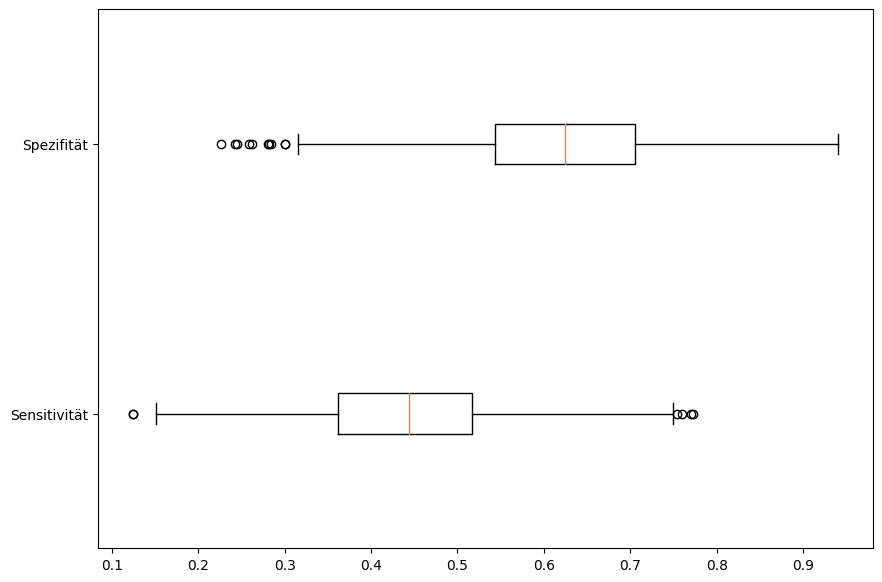

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
ax.set_yticklabels(['Sensitivität','Spezifität'])
plt.boxplot([sensitivitaet_change,spezifizitaet_change],vert = 0)
plt.show()

Neue Modelle 
- Übergangswahrscheinlichkeiten

Startzustand B, Modell (-) und Modell (+)

Modell| -| +
-|-|-
B| 0.3 | 0.7
-|0.6 | 0.4
+|0.1 | 0.9

- Emissionswahrscheinlichkeiten

Modell (-)

Symbol | Wahrscheinlichkeit
-|-
A|0.25
T|0.25
G|0.25
C|0.25

Modell (+)

Symbol | Wahrscheinlichkeit
-|-
A|0.125
T|0.125
G|0.375
C|0.375

